# Importar Bibliotecas

In [1]:
# Mudar diretório para chamar scripts com funções
import os
os.chdir('/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py')

# Importar funções e flags definidas em flags.py e functions.py
from functions import *
from flags import * 

import psycopg2
from psycopg2 import OperationalError
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import HTML
import webbrowser
from collections import defaultdict

# Ligação à base de dados

In [2]:
conn = psycopg2.connect(
    host = "contratos-base-gov1.cf87yxnqgph8.eu-central-1.rds.amazonaws.com",
    port = 5432,
    #database = "contratosbasegov",
    user = "contratosbasegov",
    password = "8n9nyeTBFUyCcLJShNrZdPUai2KQkue4")

cur = conn.cursor()

In [3]:
cur.execute('''ROLLBACK;''')

In [4]:
# Filtrar contratos : ID's concursos públicos com CPV's começados por 72
cpub = (cpv('72', 'Concurso público'))

In [5]:
# Dataframe referente ao conjuntos de contratos públicos celebrados no ramo de consultoria IT 
cp = contratos(cpub)

In [6]:
# A tabela é representada de forma correta : o id do anúncio bate certo com o preço base, contratual e restantes colunas que são relevantes
# Contudo, a ordem dos ID's em cpub é diferente da ordem dos ids na coluna ID da dataframe
# A ordem os id's guardados na variável cpub não bate certo
# Na célula a seguir a esta, é preciso redefini-la
cp = cp.rename(columns={0:'ID', 1:'NrAnuncio', 2:'PrecoBase', 3:'Prazo', 16:'DataPub', 17:'DataCel', 18:'PrecoContratual', 23:'EntConcorrentes'})
cp.head(13)

,ID,NrAnuncio,PrecoBase,Prazo,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,10001448,4840/2023,20000.00,6,False,6417636,12848310,2023-03-27,61,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,17999.09,1700348541
1,10004158,4270/2023,409500.00,39,False,6402336,12813822,2023-03-20,56,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700350494
2,10005180,6923/2023,102200.00,6,False,6469692,12961360,2023-05-02,84,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,30525.00,1700350121
3,10005452,6114/2023,16000.00,6,False,6451422,12920559,2023-04-18,76,2,...,None,None,False,None,True,None,Código dos Contratos Públicos ( DL 111-B/2017 ),None,None,1700350046
4,10007696,17004/2022,4118400.00,30,False,6216810,12474556,2022-12-22,245,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700349450
5,10007956,5712/2023,77672.00,9,False,6442490,12898547,2023-04-11,71,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700349363
6,10009799,2052/2023,232320.00,30,False,6339919,12689907,2023-02-13,31,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700351925
7,10010325,2054/2023,242000.00,30,False,6355994,12720493,2023-02-13,31,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700351769
8,10010396,3280/2023,255000.00,30,False,6374201,12760169,2023-03-03,45,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700351738
9,10010576,212/2023,211504.32,,False,6441428,12896204,2023-04-10,70,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700351669


In [7]:
cpub = tuple(cp.ID)

In [8]:
# Preço Base e Preço Contratual de todos os contratos públicos realizados para CPV's começados por 72

# Desta forma, ambos os preços são ordenados por ordem decrescente relativamente ao índice
#pb = preco_base3(cpub)
#pc = preco_contrato3(cpub)

# É preferível obter os preços a partir da dataframe visto que não há enganos assim
pb = np.array(cp.PrecoBase.replace('None', 0).astype(float))
pc = np.array(cp.PrecoContratual.replace('None', 0).astype(float))

pb[0], pc[0], cpub[0]

(20000.0, 17999.09, '10001448')

In [9]:
# Conjunto de flags disparadas para o conjunto de contratos em causa
# Largura de 10% em torno do preço base - 0.1
# Rácio máximo aceitável entre preço base e contratual de 10
f = redflag(pb, pc, 0.1, cpub, 10,cp)
f

/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:89: RuntimeWarning: divide by zero encountered in divide
  flags1 = np.where(pbase/pcontr > r)[0]
/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:89: RuntimeWarning: invalid value encountered in divide
  flags1 = np.where(pbase/pcontr > r)[0]
/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/functions.py:587: RuntimeWarning: divide by zero encountered in scalar divide
  div[i] = pbase[i]/pcont[i]


(('10004158',),
 ('10005180',),
 ('10005452',),
 ('10010396',),
 ('10016322',),
 ('10017290',),
 ('10019761',),
 ('10020982',),
 ('10038045',),
 ('10038791',),
 ('10041743',),
 ('10042376',),
 ('10044243',),
 ('10044498',),
 ('10052145',),
 ('10054158',),
 ('10055820',),
 ('10056756',),
 ('10057589',),
 ('10063680',),
 ('10063908',),
 ('10064025',),
 ('10066763',),
 ('10069033',),
 ('10071148',),
 ('10074358',),
 ('10075940',),
 ('10076421',),
 ('10079116',),
 ('10080707',),
 ('10081892',),
 ('10082883',),
 ('10083360',),
 ('10084124',),
 ('10084241',),
 ('10084688',),
 ('10088495',),
 ('10089348',),
 ('10091751',),
 ('10093824',),
 ('10094141',),
 ('10094308',),
 ('10095461',),
 ('10096038',),
 ('10096080',),
 ('10096841',),
 ('10097533',),
 ('10098326',),
 ('10098866',),
 ('10099006',),
 ('10099171',),
 ('10102898',),
 ('10103775',),
 ('10104331',),
 ('10108665',),
 ('10108756',),
 ('10109047',),
 ('10111070',),
 ('10112951',),
 ('10113116',),
 ('10113459',),
 ('10116174',),
 ('10116

# Análise do preço base

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

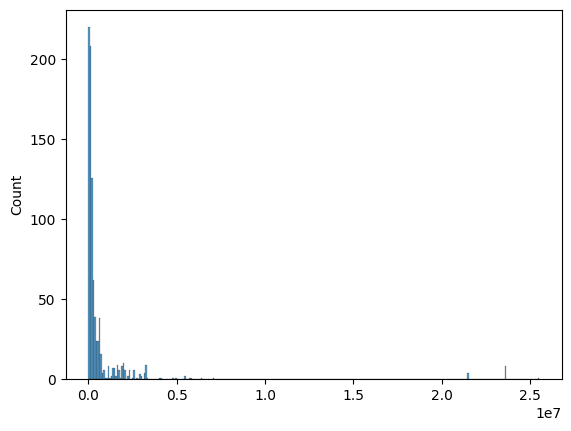

In [10]:
sns.histplot(pb)
plt.plot()

# Análise do preço contratual

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

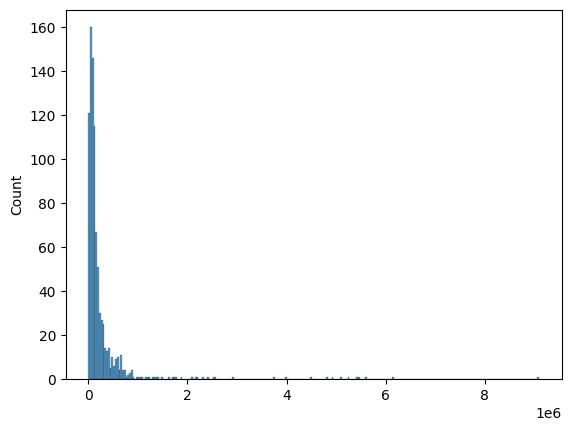

In [11]:
sns.histplot(pc)
plt.plot()

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

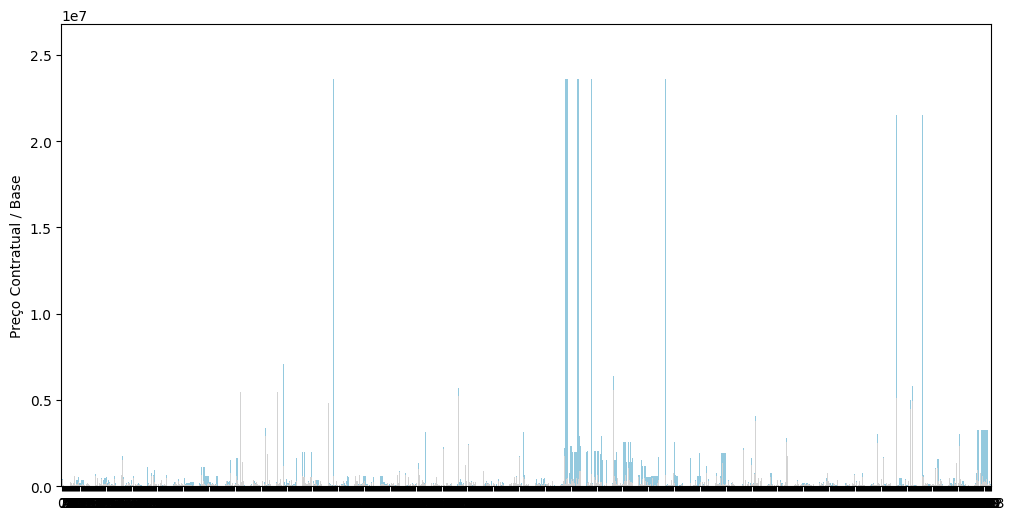

In [13]:
# Plot do Preço Base vs Preço Contratual para ver diferenças entre ambos para um mesmo contrato
df = contratos(cpub).iloc[:,[2,18]]
df = df.rename(columns={2: 'PrecoBase', 18:'PrecoContratual'})
df = df.replace('None',0).astype('float')

plt.figure(figsize=(12,6))
sns.barplot(x = df.index, y = df.PrecoBase, color = 'skyblue')
sns.barplot(x = df.index, y = df.PrecoContratual, color = 'lightgray', fill=0.1)
plt.ylabel('Preço Contratual / Base')
plt.show()

/tmp/ipykernel_90552/84178919.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.boxplot(pb/pc)
/tmp/ipykernel_90552/84178919.py:1: RuntimeWarning: invalid value encountered in divide
  sns.boxplot(pb/pc)


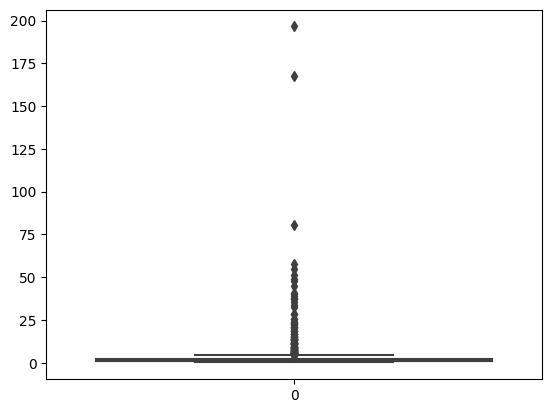

In [14]:
sns.boxplot(pb/pc)
plt.show()

/tmp/ipykernel_90552/3234519312.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.histplot(pb/pc)
/tmp/ipykernel_90552/3234519312.py:1: RuntimeWarning: invalid value encountered in divide
  sns.histplot(pb/pc)
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


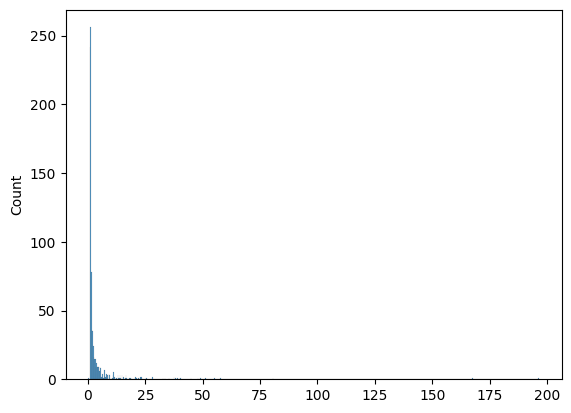

In [15]:
sns.histplot(pb/pc)
plt.show()

# Tratamento dos lotes

In [16]:
# Índice com preço contratual nulo
np.where(pc == 0)

(array([407, 558]),)

In [ ]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

(np.round(pb/pc, 4))

***

<br>

<br>

Verificar a situação em que o preco base é muito maior do que o preço contratual

1. pegar no maior valor do rácio pb/pc
2. verificar pb e pc e verificar rácio
4. obter id e verificar que bate certo usando o função contrato()
5. obter o número de anúncio
6. calcular o número de ocorrências do anúncio
7. obter id's para o mesmo número de anúncio
8. somar precos contratuais
9. comparar novamente com o preço base


**1.**

In [ ]:
# Índice do contrato com maior rácio 
rat = pb/pc
rat5 = np.where(rat > 5)[0]

print(np.where(rat > 5), '\n\n', rat[np.where(rat > 5)])

print('\n\n\n Índice do maior rácio :', np.where(rat > 30)[0])

**2.**

In [ ]:
i = 131
pb[i],pc[i], pb[i]/pc[i]

**3.**

In [ ]:
j = (cpub[i])[0]

Cc = contrato(j)
Cc

**4**

In [ ]:
n_anuncio = Cc.iloc[:,1][0]
n_anuncio

**5.**

In [ ]:
np.where(cp.NrAnuncio == n_anuncio) 

In [ ]:
contrato(cpub[131])

In [ ]:
contrato(cpub[156])

# Demonstração

In [11]:
# Datas de Publicação mais frequentes
print( cp.DataPub.apply(pd.to_datetime).dt.date.value_counts())

DataPub
2022-12-16    35
2023-09-07    15
2023-07-03    12
2023-04-05    12
2023-06-28    12
              ..
2023-08-07     1
2023-03-16     1
2023-07-22     1
2023-07-20     1
2023-05-22     1
Name: count, Length: 235, dtype: int64


In [12]:
# Filtrar contratos publicados no dia 2023-09-07
demo = cp.loc[cp['DataPub'] == '2023-09-07'].reset_index()
h(demo)

index,ID,NrAnuncio,PrecoBase,Prazo,4,5,6,7,8,9,10,11,12,13,14,15,DataPub,DataCel,PrecoContratual,19,20,21,22,EntConcorrentes,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
300,10228484,5330/2023,546000.00,30,False,6427159,12870832,2023-04-03,66,2,False,False,https://dre.pt/application/file/211344046,Anúncio de procedimento,Concurso público,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",2023-09-07,2023-08-25,232500.00,1096,"Imprensa Nacional - Casa da Moeda, S. A. (500792887)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=1)","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","HCCM CONSULTING, S.A. (503470120)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=26510)","AMT Consulting (507750934)|||Brighten SA (504106686)|||Amazon Informática, Lda (516411810)",https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=344042,https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NjI0NDMx,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2053876&ext=.pdf,false,72262000-9,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços de desenvolvimento de software,Principal,232500.0,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",Não aplicável,None,Portugal,Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1700007363
301,10228504,5330/2023,546000.00,30,False,6427159,12870832,2023-04-03,66,2,False,False,https://dre.pt/application/file/211344046,Anúncio de procedimento,Concurso público,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",2023-09-07,2023-08-25,232500.00,1096,"Imprensa Nacional - Casa da Moeda, S. A. (500792887)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=1)","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","HCCM CONSULTING, S.A. (503470120)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=26510)","Brighten SA (504106686)|||Amazon Informática, Lda (516411810)|||AMT Consulting (507750934)",https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=344042,https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NjI0NDMx,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2053879&ext=.pdf,false,72262000-9,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços de desenvolvimento de software,Principal,232500.0,"Aquisição de serviços para suporte a aplicações SAP, em regime de bolsa de horas: Lote 1 - Aquisição de bolsa de horas para suporte aos módulos de FI/CO em aplicações SAP Lote 2 - Aquisição de bolsa de horas para suporte aos módulos de Logística em aplicações SAP",Não aplicável,None,Portugal,Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1700007344
302,10228718,7550/2023,26377.20,6,False,6493396,13003405,2023-05-11,91,2,False,False,https://dre.pt/application/file/212986817,Anúncio de procedimento,Concurso público,2023002388 - AQUISIÇÃO DE ORACLE DATABASE STANDARD EDITION PARA O HOSPITAL DAS FORÇAS ARMADAS – POLO DE LISBOA,2023-09-07,2023-06-15,26337.20,366,Estado-Maior-General

In [13]:
indices = tuple(demo.ID)
preco_b = np.array(demo.PrecoBase.astype(float))
preco_c = np.array(demo.PrecoContratual.astype(float))

flags = redflag(preco_b, preco_c, 0.1, indices, 10, demo)
flags

(('10228718',), ('10230172',), ('10230712',), ('10230715',))

In [14]:
demo.loc[demo.ID.isin(['10230715', '10230712', '10230172', '10228718']), ['ID', 'NrAnuncio', 'PrecoBase', 'PrecoContratual']]

,ID,NrAnuncio,PrecoBase,PrecoContratual
2,10228718,7550/2023,26377.20,26337.20
5,10230172,8223/2023,3139486.56,150184.80
13,10230712,7712/2023,202642.00,202606.44
14,10230715,11518/2023,77240.00,71725.00


In [15]:
demo1 = demo.loc[:,['ID', 'NrAnuncio', 'PrecoBase', 'PrecoContratual']]

demo1['Diferença'] = 0
demo1['Diferença'] = preco_b - preco_c

# Criar nova coluna para as flags com valor inicial 0 para todos os contratos
demo1['Flag'] = 0  
demo1.loc[demo1['ID'].isin(['10230715', '10230712', '10230172', '10228718']), 'Flag'] = 1

demo1

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,Flag
0,10228484,5330/2023,546000.00,232500.00,313500.00,0
1,10228504,5330/2023,546000.00,232500.00,313500.00,0
2,10228718,7550/2023,26377.20,26337.20,40.00,1
3,10228788,7587/2023,183260.00,73541.16,109718.84,0
4,10229934,5840/2023,410532.56,83085.88,327446.68,0
5,10230172,8223/2023,3139486.56,150184.80,2989301.76,1
6,10230212,867/2023,598474.80,74844.00,523630.80,0
7,10230288,867/2023,598474.80,111342.00,487132.80,0
8,10230326,867/2023,598474.80,129729.60,468745.20,0
9,10230493,6846/2023,266976.00,116046.00,150930.00,0


In [16]:
percentage = flagconti(flags)

demo1['FlagCont'] = ''
demo1.loc[demo1['ID'].isin(['10230715', '10230712', '10230172', '10228718']), 'FlagCont'] = percentage

demo1

,ID,NrAnuncio,PrecoBase,PrecoContratual,Diferença,Flag,FlagCont
0,10228484,5330/2023,546000.00,232500.00,313500.00,0,
1,10228504,5330/2023,546000.00,232500.00,313500.00,0,
2,10228718,7550/2023,26377.20,26337.20,40.00,1,0.0
3,10228788,7587/2023,183260.00,73541.16,109718.84,0,
4,10229934,5840/2023,410532.56,83085.88,327446.68,0,
5,10230172,8223/2023,3139486.56,150184.80,2989301.76,1,1.0
6,10230212,867/2023,598474.80,74844.00,523630.80,0,
7,10230288,867/2023,598474.80,111342.00,487132.80,0,
8,10230326,867/2023,598474.80,129729.60,468745.20,0,
9,10230493,6846/2023,266976.00,116046.00,150930.00,0,


# Análise Prazo de Candidatura

In [17]:
flags1 = prazo(cp)
flags1

('10010576',
 '10041743',
 '10063214',
 '10096080',
 '10103775',
 '10118819',
 '10271100',
 '10318582',
 '10324626',
 '10333181',
 '10345354',
 '10349581',
 '9629534',
 '9633086',
 '9633292',
 '9634039',
 '9636192',
 '9660715',
 '9664681',
 '9747980',
 '9749656',
 '9796559',
 '9800786',
 '9811823',
 '9823998',
 '9824923',
 '9825462',
 '9827137',
 '9895495',
 '9901639',
 '9915178',
 '9953348',
 '9986637',
 '9990308',
 '9995605')

In [18]:
df_prazo = cp.loc[cp.ID.isin(prazo(cp)), ['ID', 'NrAnuncio', 'Prazo']].reset_index()
df_prazo

,index,ID,NrAnuncio,Prazo
0,9,10010576,212/2023,
1,26,10041743,296/2023,
2,52,10063214,154/2022,
3,110,10096080,1119/2023,4
4,144,10103775,1090/2023,5
5,170,10118819,478/2023,4
6,364,10271100,491/2023,
7,434,10318582,1195/2022,3
8,439,10324626,15934/2023,3
9,447,10333181,1253/2023,5


In [19]:
X = tuple(sub[0] for sub in f)
X = np.array(tuple(int(item) for item in X))

Y = np.array(tuple(int(item) for item in prazo(cp)))

xy = np.where(np.isin(Y,X))[0]
xy

array([ 1,  3,  4,  5,  6,  7,  8, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       23, 24, 28, 29, 31, 32, 33, 34])

In [21]:
# Criar nova coluna para as flags com valor inicial 0 para todos os contratos
df_prazo['Flag'] = ''
df_prazo.loc[xy,'Flag'] = 1

df_prazo['FlagCont'] = ''
perc = flagconti(tuple(df_prazo.ID[xy]))
df_prazo.loc[xy,'FlagCont'] = perc

df_prazo

,index,ID,NrAnuncio,Prazo,Flag,FlagCont
0,9,10010576,212/2023,,,
1,26,10041743,296/2023,,1,0.929995
2,52,10063214,154/2022,,,
3,110,10096080,1119/2023,4,1,0.365517
4,144,10103775,1090/2023,5,1,1.0
5,170,10118819,478/2023,4,1,1.0
6,364,10271100,491/2023,,1,1.0
7,434,10318582,1195/2022,3,1,0.149574
8,439,10324626,15934/2023,3,1,0.0
9,447,10333181,1253/2023,5,,


# Valor Flag Contínuo

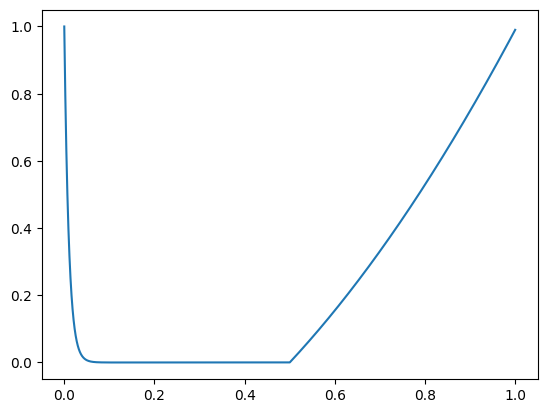

In [22]:
x = np.linspace(0,1,10000)
plt.plot(x,fun(x))
plt.show()